# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C27E4EB148>]],
      dtype=object)

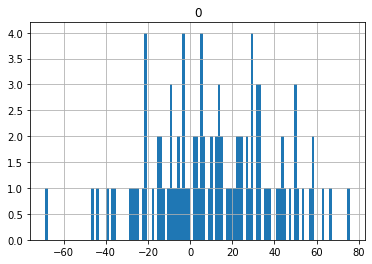

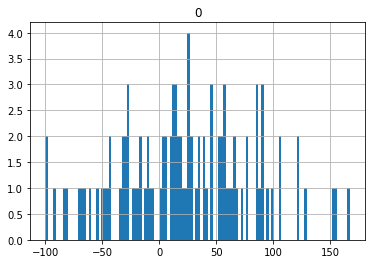

In [3]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)
#С натяжкой можно считать это распределение нормализованным.

In [4]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=-1.7338006472109972, pvalue=0.08511123469659897)

**Различий между группами нет, т.к. pvalue=8,5%, что больше 5%.
Эти группы людей можно считать независимыми, поэтому попробуем проверить решение с помощью критерия Манна-Уитни.**

In [5]:
from scipy.stats import mannwhitneyu 

stat, p = mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4343.000, p=0.054
Одинаковые распределения (не отвергаем H0)


11.345546240764518 22.557496178167234


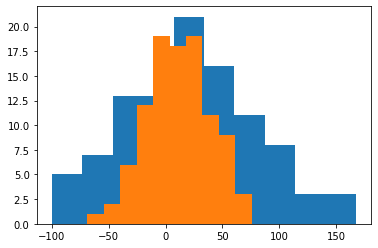

In [7]:
print(np.mean(A), np.mean(B))

plt.hist(B)
plt.hist(A);

**Таким образом, недостаточно аргументов, чтобы считать различия в эффекте значимыми. Т.е. различий в эффекте нет.**

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [32]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [41]:
before=A      # Поскольку группа та же, но в разных состояниях, то будем использовать парный тест.
after=B
weight_df=pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,11.345546,22.557496,11.211950
std,28.132539,58.226860,51.663916
min,-68.599557,-99.924867,-99.649092
25%,-8.578958,-18.437191,-19.199075
50%,11.830805,20.364583,9.234598
75%,31.637145,59.518449,43.277666
max,75.700233,167.442082,129.900241


In [42]:
stats.ttest_rel(a=before,b=after)

Ttest_relResult(statistic=-2.1701703735210716, pvalue=0.03238579156467659)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CDC7DCE848>]],
      dtype=object)

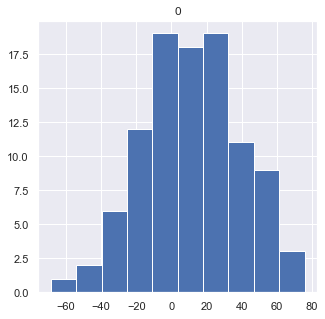

In [44]:
pd.DataFrame(before).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CDC7F55B08>]],
      dtype=object)

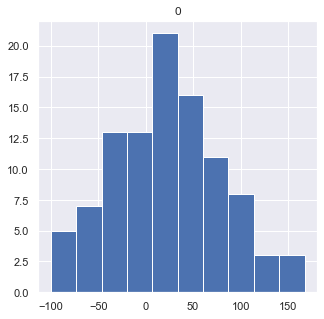

In [45]:
pd.DataFrame(after).hist()

**p value = 3,2%, т.е. у нас есть 3% шансов найти отличия между состояниями группы. Значит, статистически значимых отличий нет.**

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [8]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

from scipy.stats import f_oneway

In [9]:
F, p = f_oneway(water, nutri, mineral)

alpha = 0.05
print(F, p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

12.525963044834192 2.9240047906326866e-05
Different distribution (reject H0)


Различия значимы.

In [10]:
import seaborn as sns
import pandas as pd
category = water+nutri+mineral
df_cat = pd.DataFrame()
df_cat['figures'] = category
figures = ['water']*len(water) + ['nutri']*len(nutri) + ['mineral']*len(mineral)
df_cat['category'] = figures
df_cat

,figures,category
0,1,water
1,2,water
2,3,water
3,4,water
4,2,water
...,...,...
57,3,mineral
58,4,mineral
59,5,mineral
60,1,mineral


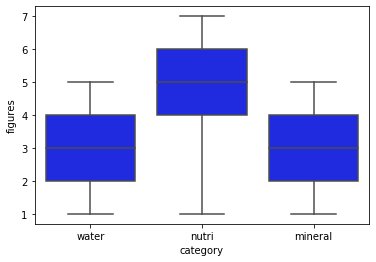

In [11]:
ax = sns.boxplot(x='category', y='figures', data=df_cat, color='#000fff')
plt.show()

**Отличаются только данные группы с удобрениями. Именно они создают эффект.**

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотреть влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [13]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head(20)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки
* `retention_7` - игрок вернулся и играл через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

Непонятна зависимость между кол-вом раундов и временем, за которое игроки могли их отыграть. 
Т.е. за какой промежуток времени большая часть игроков достигала 30-го уровня?
Могли ли игроки достичь его уже через день после установки и сразу быть возвращены? И какая часть всех игроков?

Отфильтровать данные: реализовать условие, когда sum_gamerounds >=30. О возврате и влиянии ворот можно говорить только для юзеров, которые видели ворота, достигнув уровня 30.

In [14]:
#Сгруппируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Разное количество юзер-айди для каждого типа ворот говорит о некорректно проведенном тесте, т.к. при А/В тестировании данные должны делиться строго пополам. Эта погрешность может повлиять на результат.

In [9]:
# Подсчитаем количество игроков, прошедших одинаковое количество раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.head(41)

sum_gamerounds
0     3994
1     5538
2     4606
3     3958
4     3629
5     2992
6     2861
7     2379
8     2267
9     2013
10    1752
11    1654
12    1570
13    1594
14    1519
15    1446
16    1342
17    1269
18    1228
19    1158
20    1033
21    1032
22     934
23     879
24     794
25     792
26     689
27     723
28     662
29     613
30     642
31     614
32     648
33     610
34     594
35     586
36     555
37     559
38     526
39     542
40     505
Name: userid, dtype: int64

Количество игроков стремительно падает с увеличением количества раундов. До 30 раунда дошло 642 игрока из 5538, что составляет всего лишь 11,6% и уже это говорит о том, что ставить ворота на 30-м уровне - плохая идея, не говоря уже о 40-м, т.к. шансы вернуть максимальное кол-во юзеров сокращены и 88% юзеров уже отвалилось. До раунда 40 дошло 505 игроков, т.е. 9%. Разница небольшая с уровнем 30 (2,6%).

Следует изменить условия теста, расширить выборку и задать ворота на 5538/2=2769, т.е. на 5-м раунде (куда дойдет около половины игроков) и принимать это за гипотезу Н0. Для А/В теста можно ставить ворота на уровнях: 3, 8, 10.

In [16]:
filtr30 = data[data['sum_gamerounds'] >= 30] #Отфильтруем данные с игроками, кто дошел до 30-го уровня.
filtr30.head(20)

,userid,version,sum_gamerounds,retention_1,retention_7
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False
12,2132,gate_40,30,True,False
13,2179,gate_30,39,True,False
14,2218,gate_30,305,True,True
15,2382,gate_30,73,True,False


In [17]:
filtr30.count()

userid            33269
version           33269
sum_gamerounds    33269
retention_1       33269
retention_7       33269
dtype: int64

In [18]:
filtr30.groupby(['version', 'retention_1']).count()

userid  sum_gamerounds  retention_7
version retention_1                                     
gate_30 False          3315            3315         3315
        True          13341           13341        13341
gate_40 False          3292            3292         3292
        True          13321           13321        13321

Видим очень незначительные расхождения в кол-ве юзеров по типам ворот, что еще раз подтверждает изначально кривой тест.
С другой стороны, огромная разница между True & False: большое количество вернувшихся.

In [13]:
filtr30.groupby(['version', 'retention_7']).count()

userid  sum_gamerounds  retention_1
version retention_7                                     
gate_30 False          9348            9348         9348
        True           7308            7308         7308
gate_40 False          9469            9469         9469
        True           7144            7144         7144

Разница между True & False небольшая, кроме того, спустя неделю большее кол-во игроков не возвращается, чем возвращается. Сравнивая с предыдущей ячейкой, можно сказать, что большее влияние оказали не ворота, а срок (1 и 7 дней).
Это значит, что стоит тестировать не 1 день возврата, а брать больший период и возвращать прошедших меньшее кол-во раундов, чем 30. Очевидно, что спустя 1 день будет возвращаться максимальное кол-во игроков и влияние ворот будет неощутимо.
Т.о., на возврат юзеров больше влияет время взаимодействия с игрой, т.е. важен критерий общего кол-ва раундов. На 7-й день возвращать сложнее, чем в 1-й день.

Для определения влияния места ворот на возврат юзеров возьмем ворота и суммарное количество раундов для юзеров.

In [19]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1009027049.500, p=0.025
Разные распределения (отвергаем H0)


Т.е. влияние есть.

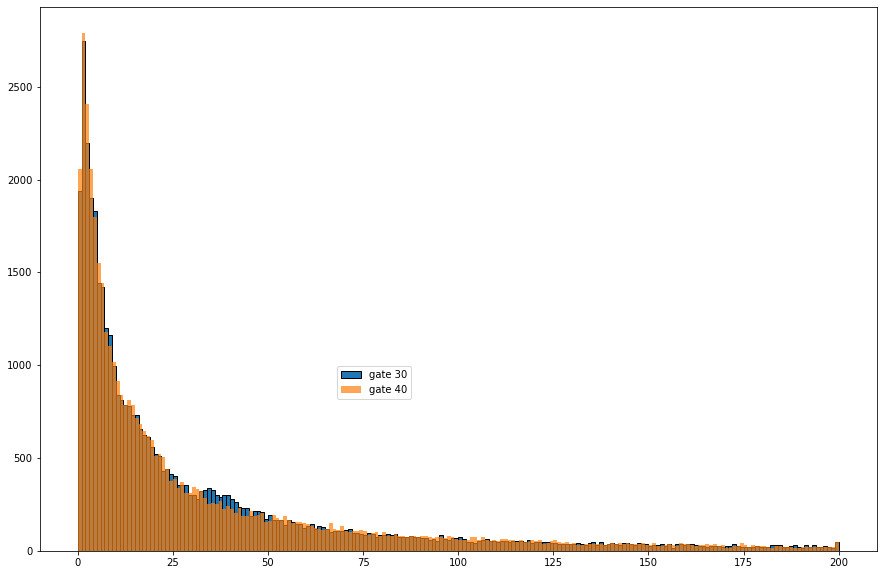

In [11]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

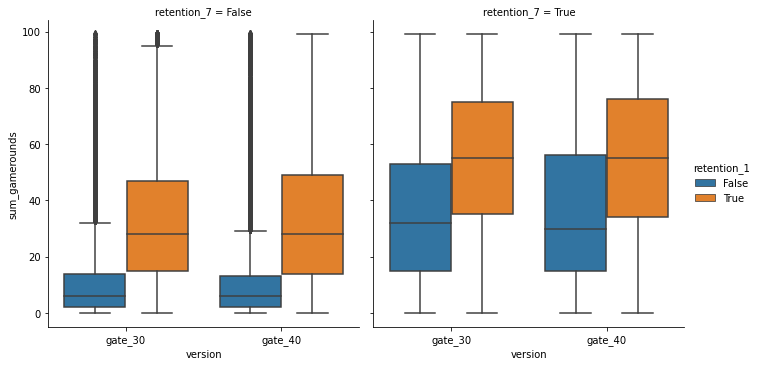

In [12]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


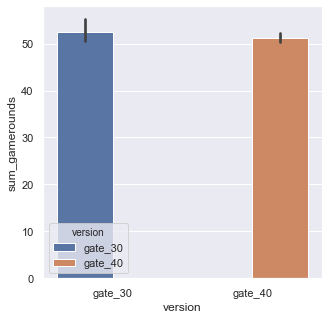

In [42]:
import seaborn as sns
sns.set(rc={'figure.figsize':(5, 5)})
ax = sns.barplot( x='version', y='sum_gamerounds', data=data, hue='version')

<Figure size 1080x720 with 0 Axes>

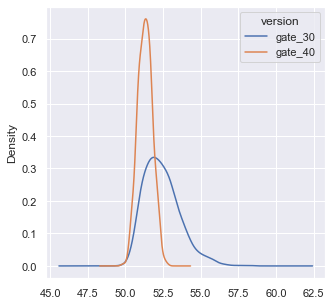

In [43]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['sum_gamerounds'].mean()
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<Figure size 1080x720 with 0 Axes>

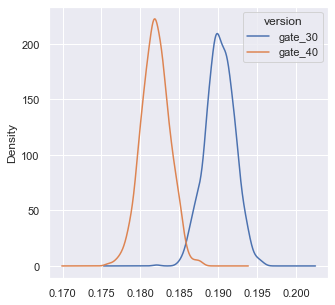

In [45]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

#### Т.о. видим, что влияние места ворот на возврат юзеров статистически значимо, т.е. место ворот влияет на возврат юзеров. 
Если в дополнение мы переставим ворота на начальные раунды, то, скорее всего, сможем возвращать львиную долю юзеров. Для достижения максимального эффекта следует изменить условия теста: задать ворота на 5-м раунде (куда дойдет около половины игроков) и принимать это за контрольную выборку. Для А/В теста можно ставить ворота на уровнях: 3, 8, 10. Затем делать замеры.
Что касается времени, то точно не стоит брать в расчет возврат в 1-й день после установки. Лучше брать хотя бы с 3-го дня. Также нужно определить корреляцию между днями (кол-во дней после регистрации) и кол-вом раундов (без ворот), для очищения рез-тов теста и лучшего понимания влияний.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [2]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head(20)
 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [62]:
pokemon.groupby('Class 1').count()
#Посмотрим, какие есть классы

,pid,Name,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Class 1,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17
Fighting,27,26,7,27,27,27,27,27,27,27
Fire,52,52,24,52,52,52,52,52,52,52
Flying,4,4,2,4,4,4,4,4,4,4
Ghost,32,32,22,32,32,32,32,32,32,32


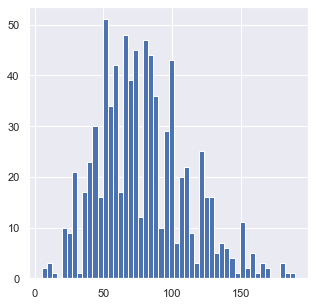

In [73]:
pokemon[pokemon.Attack<500].Attack.hist(bins=50)
#Не особо нормальное распределение.

In [68]:
filtered_grass = pokemon[ (pokemon['Class 1']=='Grass') | (pokemon['Class 2']=='Grass') ]
filtered_grass.head(10)
#ФИльтруем нужный класс

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False
49,50,Gloom,Grass,Poison,60,65,70,85,75,40,False
50,51,Vileplume,Grass,Poison,75,80,85,110,90,50,False
51,52,Paras,Bug,Grass,35,70,55,45,55,25,False
52,53,Parasect,Bug,Grass,60,95,80,60,80,30,False
75,76,Bellsprout,Grass,Poison,50,75,35,70,30,40,False


In [91]:
filtered_rock = pokemon[ (pokemon['Class 1']=='Rock') | (pokemon['Class 2']=='Rock') ]
filtered_rock.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [75]:
#Применим дисперсионный анализ, отфильтровав только нужный столбец.
from scipy.stats import f_oneway

F, p = f_oneway(filtered_grass['Attack'], filtered_rock['Attack'])  

alpha = 0.05  
print(F, p)   

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

13.04893577287016 0.00041253671008344346
Разное распределение (отклоняем H0)


**Есть различия в силе атаки между классами Grass и Rock. Явно видно:**

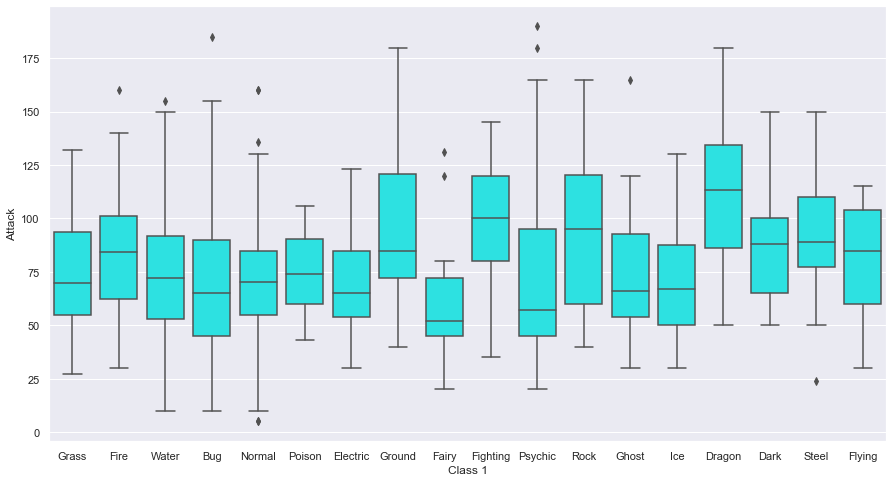

In [90]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
ax = sns.boxplot(x='Class 1', y='Attack', data=pokemon, color='#0FFFFF')

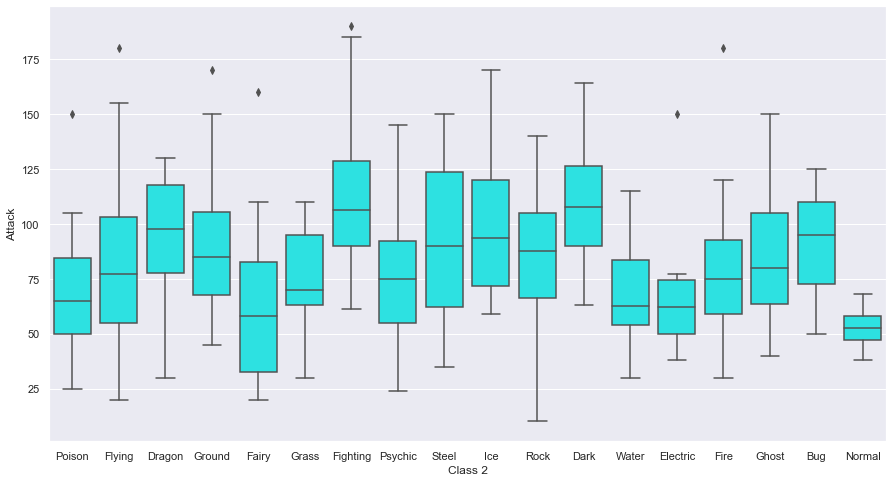

In [97]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
ax = sns.boxplot(x='Class 2', y='Attack', data=pokemon, color='#0FFFFF')

**У Рок медиана выше, т.е. более сильную атаку имеет класс Рок, а не Грасс.**

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [84]:
filtered_water = pokemon[ (pokemon['Class 1']=='Water') | (pokemon['Class 2']=='Water') ]
filtered_water.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False


In [85]:
filtered_normal = pokemon[ (pokemon['Class 1']=='Normal') | (pokemon['Class 2']=='Normal') ]
filtered_normal.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [92]:
from scipy.stats import f_oneway

F, p = f_oneway(filtered_water['Speed'], filtered_normal['Speed'])  

alpha = 0.05  
print(F, p)   

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

4.631304129508141 0.03245358552652922
Разное распределение (отклоняем H0)


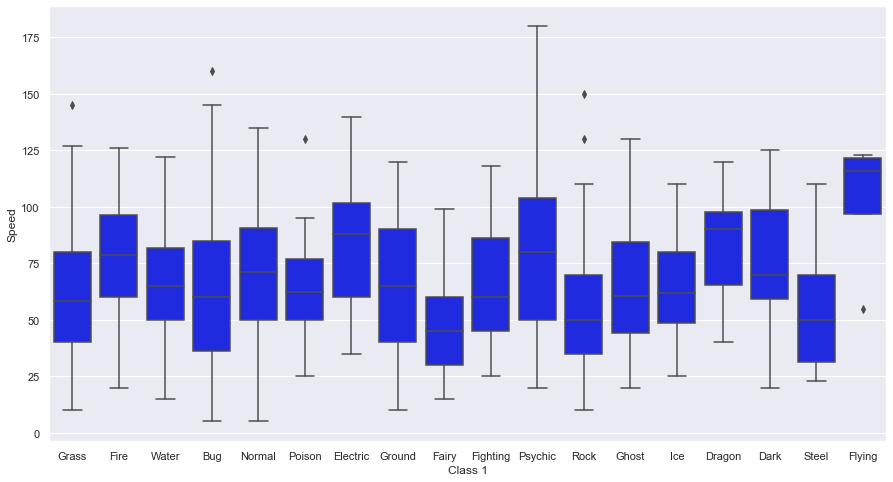

In [95]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
ax = sns.boxplot(x='Class 1', y='Speed', data=pokemon, color='#000FFF')

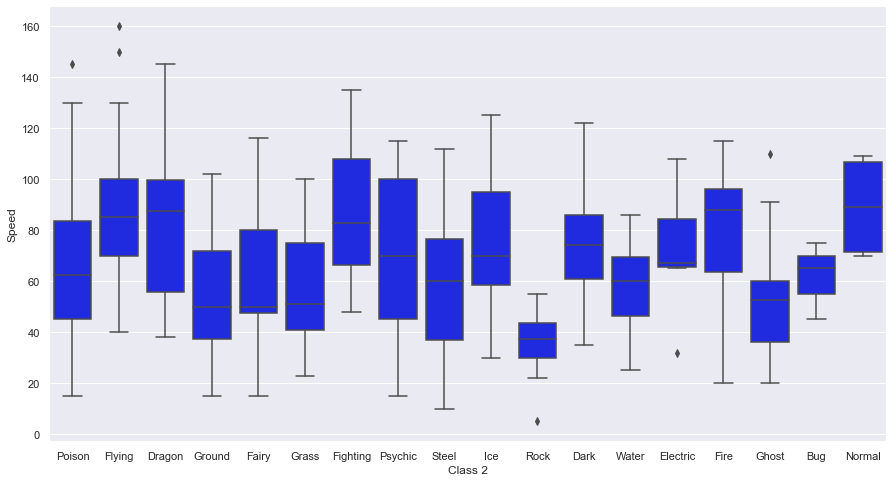

In [96]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
ax = sns.boxplot(x='Class 2', y='Speed', data=pokemon, color='#000FFF')

**Более быстрые покемоны в классе Normal, а не Water.**

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [98]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [102]:
filtered_name = pokemon[ (pokemon['Name']=='Mega Beedrill') | (pokemon['Name']=='Mega Alakazam') | (pokemon['Name']=='Deoxys Normal Forme') | (pokemon['Name']=='Mega Lopunny')]
filtered_name.head(15)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


Только 4 покемона. И сравнивать придется со всей совокупностью.

In [103]:
from scipy.stats import f_oneway

F, p = f_oneway(pokemon['Speed'], filtered_name['Speed'])  

alpha = 0.05  
print(F, p)   

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

27.83973509146876 1.6972695854945625e-07
Разное распределение (отклоняем H0)


In [104]:
from scipy.stats import mannwhitneyu   #Проверим еще и этим способом. Выборки можно считать независимыми.

stat, p = mannwhitneyu(pokemon['Speed'], filtered_name['Speed']) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=27.500, p=0.000
Разные распределения (отвергаем H0)


68.2775 145.0


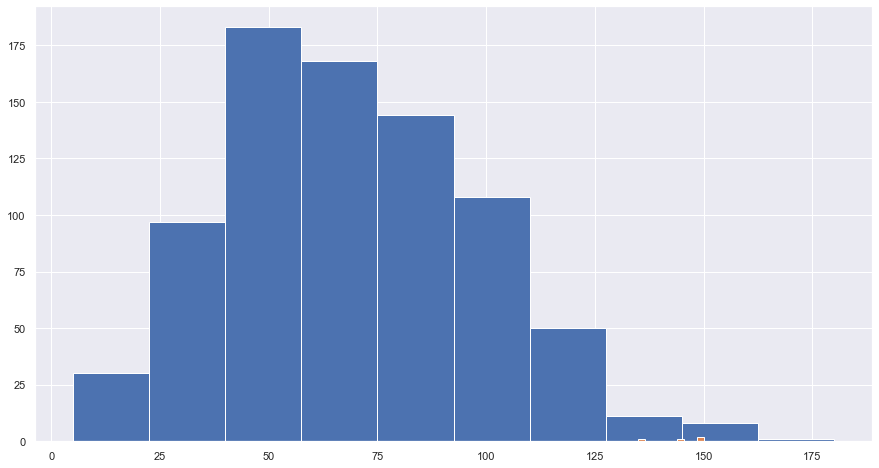

In [105]:
print(np.mean(pokemon['Speed']), np.mean(filtered_name['Speed']))

plt.hist(pokemon['Speed'])
plt.hist(filtered_name['Speed']);

**Учитывая среднюю скорость 145 4-х покемонов vs. скорости 68 всей совокупности, вакцина сработала.**

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [25]:
filtered_legendt = pokemon[(pokemon['Legendary']==True)]
filtered_legendt.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
262,263,Raikou,Electric,NaN,90,85,75,115,100,115,True
263,264,Entei,Fire,NaN,115,115,85,90,75,100,True
264,265,Suicune,Water,NaN,100,75,115,90,115,85,True
269,270,Lugia,Psychic,Flying,106,90,130,90,154,110,True


In [39]:
filtered_legend = filtered_legendt[['HP','Attack','Defense']]
filtered_legend

,HP,Attack,Defense
156,90,85,100
157,90,90,85
158,90,100,90
162,106,110,90
163,106,190,100
...,...,...,...
795,50,100,150
796,50,160,110
797,80,110,60
798,80,160,60


In [40]:
filtered_legend.mean()

HP          92.738462
Attack     116.676923
Defense     99.661538
dtype: float64

In [32]:
filtered_nonlegendt = pokemon[(pokemon['Legendary']==False)]
filtered_nonlegendt.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


In [34]:
filtered_nonlegend = filtered_nonlegendt[['HP','Attack','Defense']]
filtered_nonlegend

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43
...,...,...,...
787,85,100,122
788,55,69,85
789,95,117,184
790,40,30,35


In [41]:
filtered_nonlegend.mean()

HP         67.182313
Attack     75.669388
Defense    71.559184
dtype: float64

HP          92.738462
Attack     116.676923
Defense     99.661538
dtype: float64 HP         67.182313
Attack     75.669388
Defense    71.559184
dtype: float64


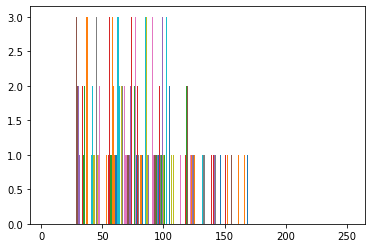

In [42]:
print(np.mean(filtered_legend), np.mean(filtered_nonlegend))

plt.hist(filtered_legend)
plt.hist(filtered_nonlegend);

**Из-за большого количества сравниваемых данных несколько сложно создать нормальный визуал. Но по средним видно, что средние у легендарных выше. Это значит, что их характеристики превосходят остальных покемонов.**

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [29]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [50]:
filtered_best_defence = pokemon[ (pokemon['Class 1']=='Rock') | (pokemon['Class 2']=='Rock') | (pokemon['Class 1']=='Ground') | (pokemon['Class 2']=='Ground') | (pokemon['Class 1']=='Steel')| (pokemon['Class 2']=='Steel')| (pokemon['Class 1']=='Ice')| (pokemon['Class 2']=='Ice')]
filtered_best_defence.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False
56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,False
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
88,89,Magnemite,Electric,Steel,25,35,70,95,55,45,False


In [63]:
filtr_pokemon = pokemon[['Class 1','Class 2','Defense']]
filtr_pokemon

,Class 1,Class 2,Defense
0,Grass,Poison,49
1,Grass,Poison,63
2,Grass,Poison,83
3,Grass,Poison,123
4,Fire,NaN,43
...,...,...,...
795,Rock,Fairy,150
796,Rock,Fairy,110
797,Psychic,Ghost,60
798,Psychic,Dark,60


In [75]:
rock = filtr_pokemon[ (filtr_pokemon['Class 1']=='Rock') | (filtr_pokemon['Class 2']=='Rock') ]
rock.head()

,Class 1,Class 2,Defense
80,Rock,Ground,100
81,Rock,Ground,115
82,Rock,Ground,130
103,Rock,Ground,160
119,Ground,Rock,95


In [73]:
rock_l = rock['Defense'].to_list()
print(rock_l)

[100, 115, 130, 160, 95, 120, 100, 125, 90, 105, 65, 85, 115, 230, 120, 85, 50, 70, 110, 150, 135, 100, 140, 180, 65, 85, 77, 97, 50, 100, 130, 200, 40, 60, 118, 168, 95, 130, 145, 85, 105, 130, 85, 125, 103, 133, 45, 65, 90, 67, 115, 77, 119, 50, 72, 150, 150, 110]


In [76]:
ground = filtr_pokemon[ (filtr_pokemon['Class 1']=='Ground') | (filtr_pokemon['Class 2']=='Ground') ]
ground.head()

,Class 1,Class 2,Defense
32,Ground,NaN,85
33,Ground,NaN,110
36,Poison,Ground,87
39,Poison,Ground,77
55,Ground,NaN,25


In [74]:
ground_l = ground['Defense'].to_list()
print(ground_l)

[85, 110, 87, 77, 25, 50, 100, 115, 130, 160, 95, 110, 95, 120, 45, 85, 105, 200, 230, 40, 80, 60, 120, 50, 70, 70, 90, 110, 90, 40, 70, 100, 45, 50, 80, 43, 73, 55, 105, 140, 160, 105, 105, 68, 45, 65, 95, 115, 78, 118, 130, 125, 80, 40, 60, 55, 75, 35, 45, 80, 84, 50, 80, 90, 90, 77, 121]


In [77]:
steel = filtr_pokemon[ (filtr_pokemon['Class 1']=='Steel') | (filtr_pokemon['Class 2']=='Steel') ]
steel.head()

,Class 1,Class 2,Defense
88,Electric,Steel,70
89,Electric,Steel,95
220,Bug,Steel,140
223,Steel,Ground,200
224,Steel,Ground,230


In [78]:
steel_l = steel['Defense'].to_list()
print(steel_l)

[70, 95, 140, 200, 230, 100, 140, 140, 85, 125, 100, 140, 180, 230, 80, 100, 130, 150, 150, 100, 88, 118, 168, 95, 86, 116, 70, 88, 115, 145, 120, 106, 60, 105, 91, 131, 70, 95, 115, 70, 100, 112, 129, 95, 100, 150, 50, 150, 91]


In [79]:
ice = filtr_pokemon[ (filtr_pokemon['Class 1']=='Ice') | (filtr_pokemon['Class 2']=='Ice') ]
ice.head()

,Class 1,Class 2,Defense
94,Water,Ice,80
98,Water,Ice,180
133,Ice,Psychic,35
142,Water,Ice,80
156,Ice,Flying,100


In [80]:
ice_l = ice['Defense'].to_list()
print(ice_l)

[80, 180, 35, 80, 100, 55, 40, 80, 45, 15, 50, 80, 80, 50, 70, 90, 100, 50, 75, 105, 65, 110, 80, 70, 107, 50, 65, 85, 40, 80, 30, 90, 100, 90, 50, 72, 85, 184]


In [81]:
from scipy.stats import f_oneway
F, p = f_oneway(rock_l, ground_l, steel_l, ice_l)
alpha = 0.05
print(F, p)   

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

10.82012408304731 1.231528168152447e-06
Разное распределение (отклоняем H0)


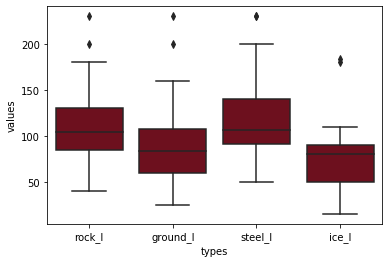

In [86]:
import seaborn as sns 

values = rock_l + ground_l + steel_l + ice_l
types = ['rock_l']*len(rock_l) + ['ground_l']*len(ground_l)+['steel_l']*len(steel_l)+['ice_l']*len(ice_l)
df_mid = pd.DataFrame()
df_mid['types'] = types
df_mid['values'] = values

ax = sns.boxplot(x='types', y='values', data=df_mid, color='#7d0013')
plt.show()

Эти классы покемонов отличаются по уровню защиты, а именно: Стил и Рок отличаются от Граунд и Айс. Причем внутри пар они довольно близки по медиане.